In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import math
plt.rcParams['figure.figsize'] = [12, 6]


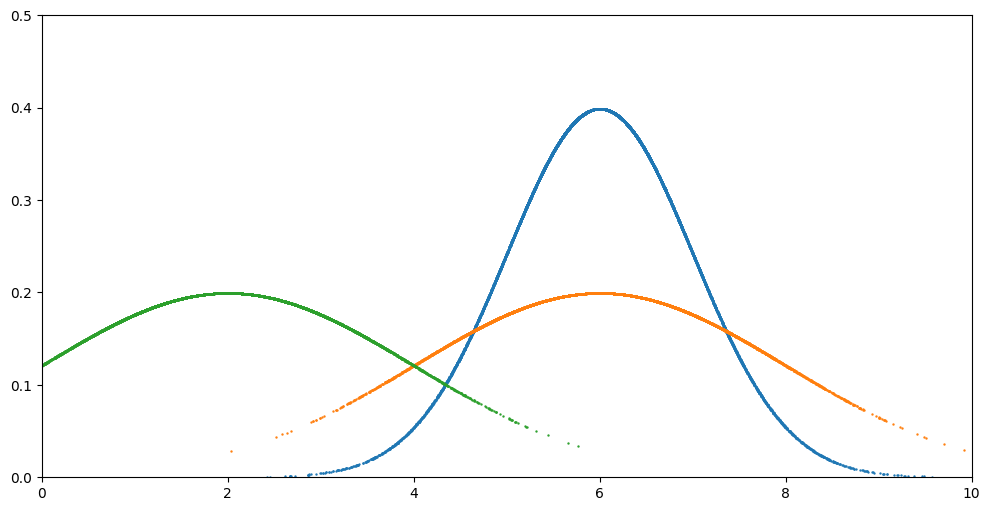

In [7]:
# Zadanie 1

def K(x, xi=3, h=1):
  return (1/math.sqrt(2*math.pi*h))*math.e ** ( -(x-xi)**2/(2*h) )

seed = 2
m = 10000
mean = 6 #przesuwa szczyt kapelusz
std = 1
h = 1 # wyostrcza albo wyplaszcza
np.random.seed(seed)

X = np.random.normal(mean, std, m)
Y = [K(x, mean, h) for x in X]

X2 = np.random.normal(mean, std, m)
Y2 = [K(x, mean, 4) for x in X2]

X3 = np.random.normal(2, std, m)
Y3 = [K(x, 2, 4) for x in X3]

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.scatter(X, Y, s=0.5)
plt.scatter(X2, Y2, s=0.5)
plt.scatter(X3, Y3, s=0.5)

plt.show()

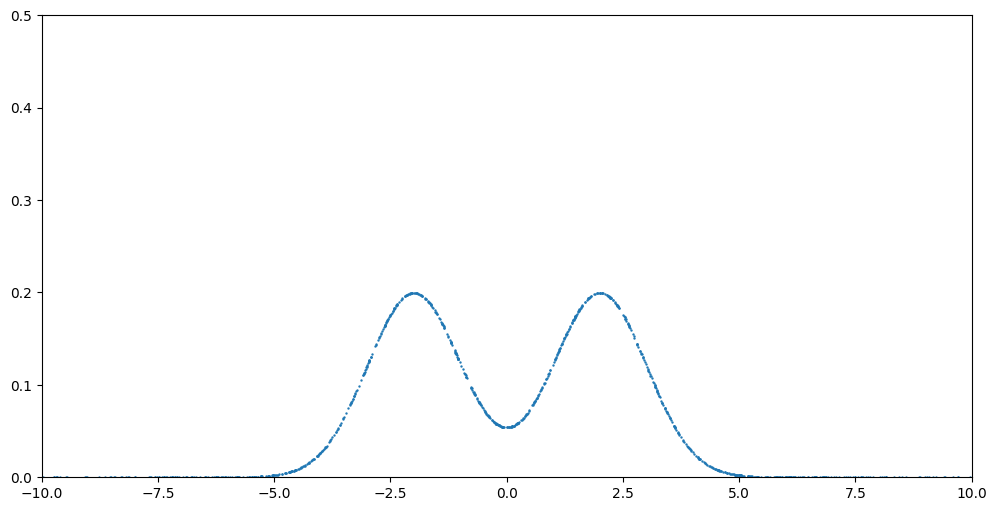

In [8]:
# Zadanie 2
# Srednia z funkcji K

def f(x, X, h=1):
  ret = 0.0
  for xi in X:
      ret += K(x, xi, h)
  return ret/len(X)

m = 1000
mean = 0 #przesuwa szczyt kapelusza
std = 1
h = 1 # wyostrcza albo wyplaszcza

X = np.random.normal(mean, 5, m)
Xi = [-2, 2]
Ys = []

for xi in Xi:
  Ys.append( [K(x, xi, h) for x in X] )

Y = [(y1+y2)/2 for y1, y2 in zip(Ys[0], Ys[1])]


plt.xlim(-10, 10)
plt.ylim(0, 0.5)

#plt.scatter(X, Ys[0], s=0.5)
#plt.scatter(X, Ys[1], s=0.5)
plt.scatter(X, Y, s=0.5)

plt.show()

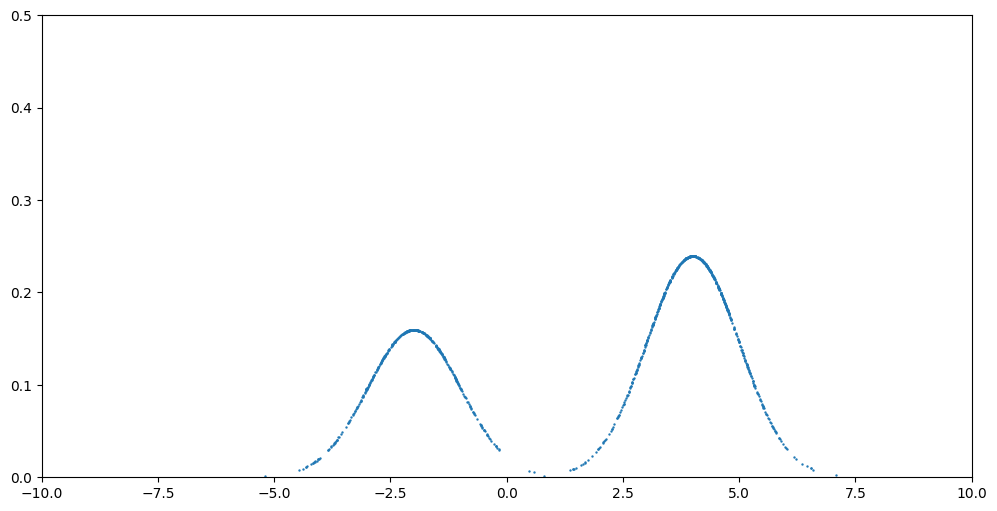

In [9]:
# Zadanie 3
# Rozne skale i rozne rozklady

m = 1000
p1 = 0.4
p2 = 1 - p1
m1 = int(p1 * m)
m2 = m - m1
h = 1 # wyostrcza albo wyplaszcza

X1 = np.random.normal(-2, 1, m1)
X2 = np.random.normal(4, 1, m2)

Y1 = [K(x, -2, h) for x in X1]
Y2 = [K(x, 4, h) for x in X2]



X = np.concatenate([X1, X2])
Y1 = [y*p1 for y in Y1]
Y2 = [y*p2 for y in Y2]
Y = [y1 for y1 in np.hstack([Y1, Y2])]



plt.xlim(-10, 10)
plt.ylim(0, 0.5)

plt.scatter(X, Y, s=0.5)

plt.show()


In [63]:
# Zadanie 4
# Rozne skale i rozne rozklady dla 3 podzbiorow
m = 10
p1 = 0.4
p2 = 0.3
p3 = 1 - p1 - p2
m1 = int(p1 * m)
m2 = int(p2 * m)
m3 = int(p3 * m)
h = 1 # wyostrcza albo wyplaszcza

X1 = np.random.normal(-5, 2, m1)
X2 = np.random.normal(-1, 1, m2)
X3 = np.random.normal(-7, 0, m3)

Xi = np.concatenate([X1, X2, X3])
X = np.linspace(-10, 10, 1000)
Y = [f(x, Xi, h) for x in X]

plt.xlim(-10, 10)
plt.ylim(0, 0.5)
plt.scatter(X, Y, s=0.5)

plt.show()


TypeError: K() takes 1 positional argument but 3 were given

0.014846240551091603


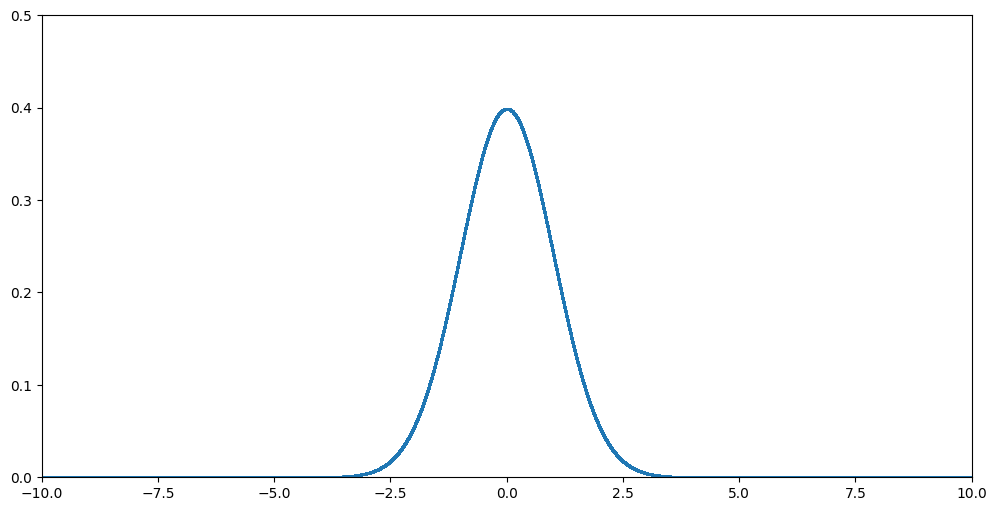

In [67]:
# Zadanie 5
# Zastosowac estymator jadrowy
# Wsadzic H z tego algorytmu co wyslal
# Dla m = 100 jakie H wychodzi?
# Powinno wychodzic mniejsze

# Potem dla m = 1000 jakie H wychodzi

# Potem dla m = 10000

# Zaleznosci miedzy m a h, m sie zwieksza to estymacja jest lepsza.
# Jak oddalenie rozkladow wplywa na estymacje (-7, 0, 4) - sprawdzic bardziej rozjechane

def function_3_44(x):
    return (1/math.sqrt( 2*math.pi )) * math.exp( -(x**2)/2 ) 

# V(j)
def function_2_52(m, X):
    sum1 = 0.0
    for i in X:
        sum1 += (i**2)
    sum1 = (1/(m-1))*sum1
    sum2 = 0.0
    for i in X:
        sum2 += i
    sum2 = sum2**2
    sum2 = (1/(m*(m-1))) * sum2
    return sum1 - sum2

# sigma -> pierwiastek z V -> pierwiastek z function_2_52
def function_2_53(data):
    return math.sqrt( data )

# c8
def function_3_65(sigma):
    return 105/(32 * math.sqrt(math.pi) * (sigma**9))

# function_3_76
K6 = -(15/math.sqrt(2*math.pi))

# function_3_74
K4 = 3/math.sqrt(2*math.pi)

# U(K) z tabeli 3.3
UK = 1

# W(K) z tabeli 3.3
WK = 1/(2*math.sqrt(math.pi))

# Funkcja 3_64 ale z podstawionym E = 6
def function_3_64_6(m, X, h):
    sum = 0.0
    for i in X:
        sum += K6 * (i/h)
    sum = (1/( (m**2) * (h**(7)) )) * sum
    return sum

# Funkcja 3_64 ale z podstawionym E = 4
def function_3_64_4(m, X, h):
    sum = 0.0
    for i in X:
        sum += K4 * (i/h)
    sum = (1/( (m**2) * (h**(5)) )) * sum
    return sum


# h(ii)
def function_3_66(c8, m):
    upper = -2 * K6 
    lower = UK * c8 * m
    return ( upper/lower )**(1/9)

# h(i)
def function_3_67(C, m):
    upper = -2 * K4
    lower = UK * C * m
    return ( upper/lower )**(1/7)

def function_3_31(Z, m):
    lower = (UK**2) * Z * m
    return (WK/lower)**(1/5)


m = 1000000
X = np.linspace(-10, 10, m)
Y = [function_3_44(x) for x in X]

sigma = function_2_53( function_2_52(m, Y) )
c8 = function_3_65(sigma)
hii = function_3_66(c8, m)
c6hii = function_3_64_6(m, Y, hii)
hi = function_3_67(c6hii, m)
c4hi = function_3_64_4(m, Y, hi)
h = function_3_31(c4hi, m)
print(h)

plt.xlim(-10, 10)
plt.ylim(0, 0.5)
plt.scatter(X, Y, s=0.5)

plt.show()
